In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("census-income.csv")
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
                   object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
                   0
dtype: int64

In [7]:

df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [8]:
# Rename the 14th column
df = df.rename(columns={df.columns[14]: 'Income'})

# Display the updated DataFrame
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# LabelEncoders

from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include = ['object']).columns    
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32561 non-null  int64
 1    workclass       32561 non-null  int32
 2    fnlwgt          32561 non-null  int64
 3    education       32561 non-null  int32
 4    education-num   32561 non-null  int64
 5    marital-status  32561 non-null  int32
 6    occupation      32561 non-null  int32
 7    relationship    32561 non-null  int32
 8    race            32561 non-null  int32
 9    sex             32561 non-null  int32
 10   capital-gain    32561 non-null  int64
 11   capital-loss    32561 non-null  int64
 12   hours-per-week  32561 non-null  int64
 13   native-country  32561 non-null  int32
 14  Income           32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


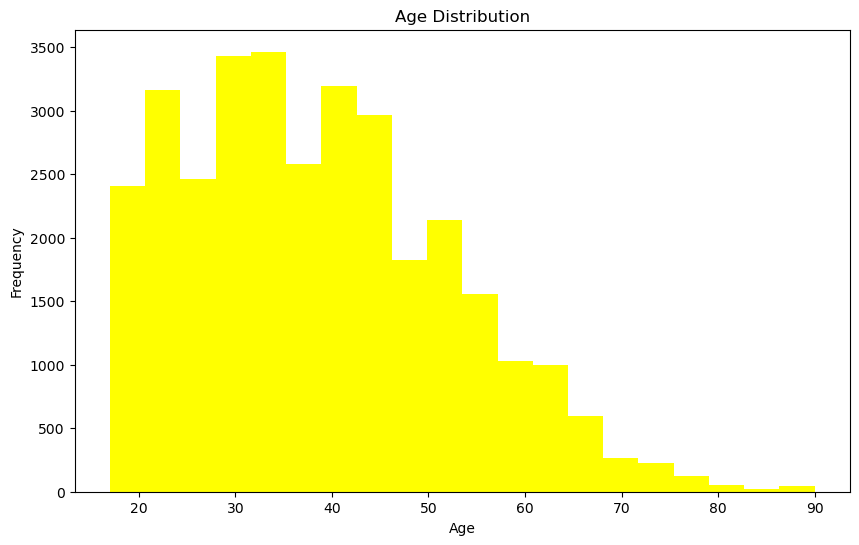

In [11]:
# Data Visualizations

plt.figure(figsize = (10,6))
plt.hist(df['age'], bins = 20, color = 'yellow')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

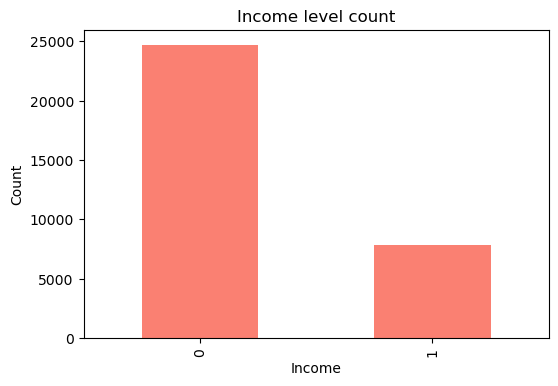

In [12]:
plt.figure(figsize = (6,4))
df['Income'].value_counts().plot(kind = 'bar', color = 'salmon')
plt.title('Income level count')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


<Figure size 2000x1000 with 0 Axes>

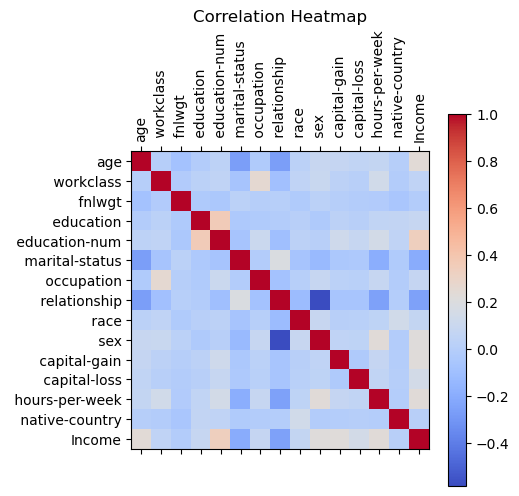

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [14]:
# Random Forest

x = df.iloc[:, :-1]
y = df['Income']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [16]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = RF.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6933,  522],
       [ 859, 1455]], dtype=int64)

In [19]:
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.8586344559320299

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.74      0.63      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [21]:
# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([0, 1, 1, ..., 0, 1, 1])

In [25]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt

array([[6497,  958],
       [ 889, 1425]], dtype=int64)

In [26]:
acc_score_dt = accuracy_score(y_test, y_pred_dt)
acc_score_dt

0.8109325417135838

In [27]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7455
           1       0.60      0.62      0.61      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



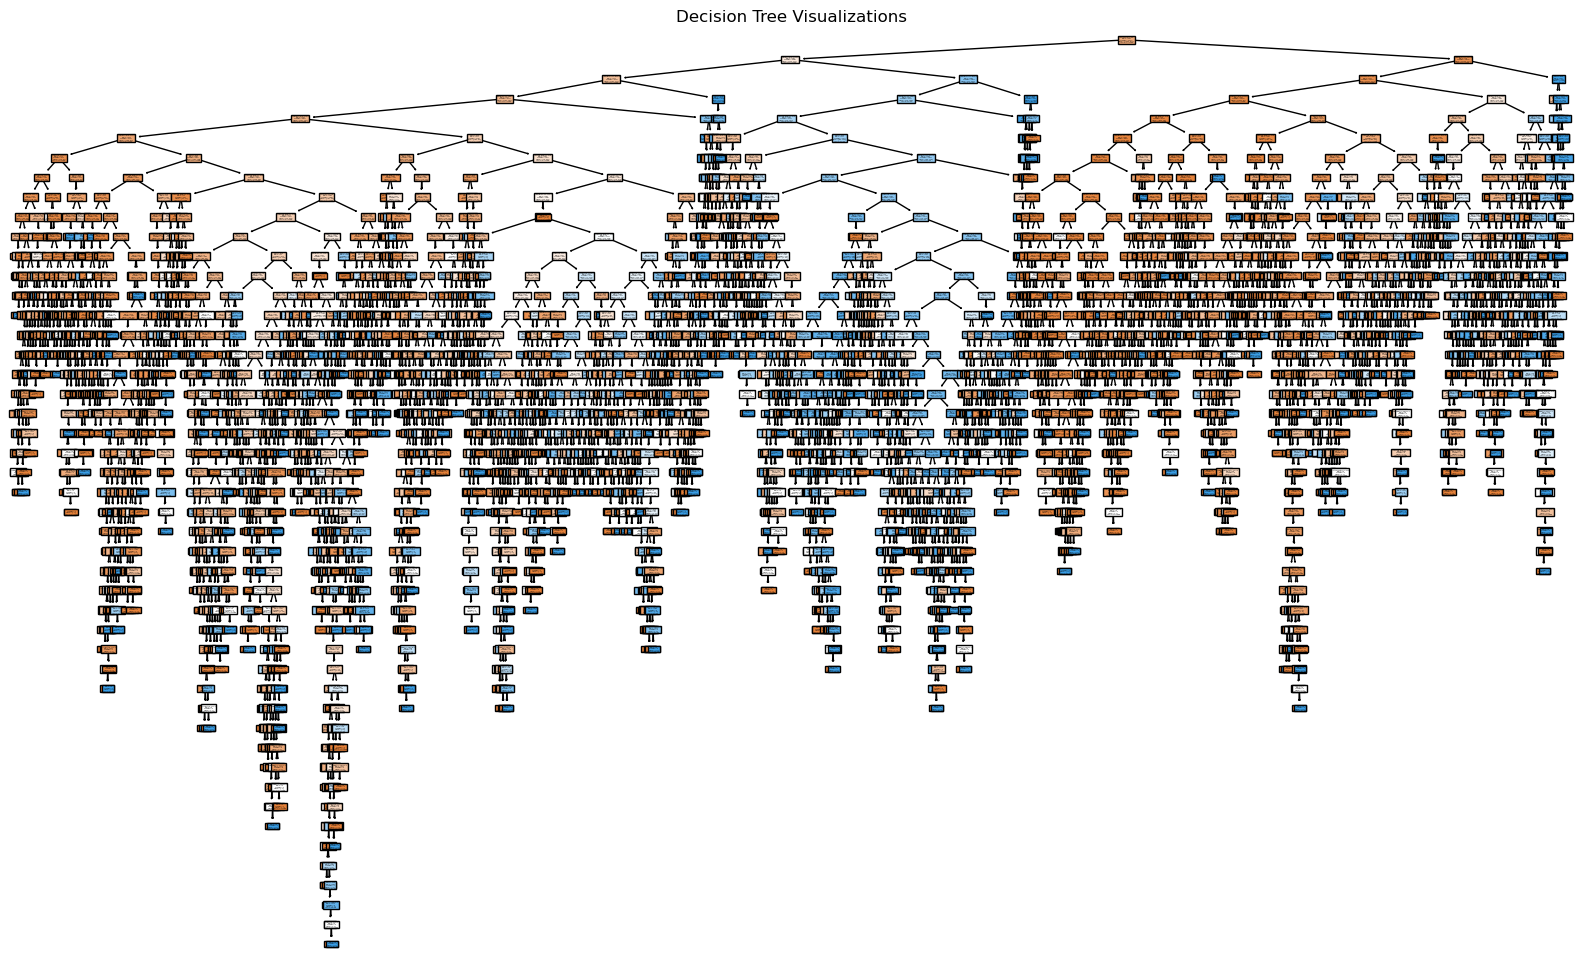

In [30]:
# Lets visualize the decision tree

from sklearn import tree

plt.figure(figsize = (20,12))
tree.plot_tree(dt, feature_names = df.columns[:-1], class_names = ['No Income', 'Income'], filled = True)
#tree.plot_tree(dt, feature_names = df.columns[:-1], class_names = ['No disease', 'Disease'], filled = True)
plt.title('Decision Tree Visualizations')
plt.show()

In [29]:
best_model = ""
best_accuracy = max(acc_score, acc_score_dt)
if best_accuracy == acc_score:
    best_model = 'Random Forest'
else:
    best_model = 'Decision Tree'
    
print("Best model: ", best_model)    

Best model:  Random Forest
